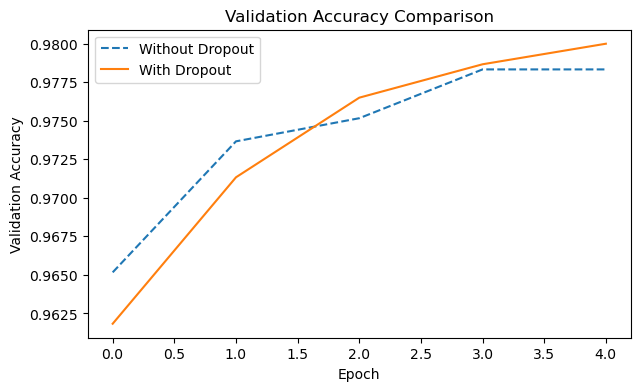

✅ Without Dropout: 0.9763
✅ With Dropout:    0.9757


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# بارگذاری داده 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# مدل بدون Dropout (پایه) 
model_base = keras.Sequential([layers.Input(shape=(28,28)),layers.Flatten(),layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')])

model_base.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_base = model_base.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=0)

# مدل با Dropout
model_dropout = keras.Sequential([layers.Input(shape=(28,28)),layers.Flatten(),layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),layers.Dense(10, activation='softmax')])

model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_drop = model_dropout.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=0)

# مقایسه 
plt.figure(figsize=(7,4))
plt.plot(history_base.history['val_accuracy'], label='Without Dropout', linestyle='--')
plt.plot(history_drop.history['val_accuracy'], label='With Dropout', linestyle='-')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

#  ارزیابی نهایی 
test_acc_base = model_base.evaluate(x_test, y_test, verbose=0)[1]
test_acc_drop = model_dropout.evaluate(x_test, y_test, verbose=0)[1]

print(f"✅ Without Dropout: {test_acc_base:.4f}")
print(f"✅ With Dropout:    {test_acc_drop:.4f}")
